# Produit vectoriel

## Exercice
Soient les vecteurs $\vec{u}=\left(\begin{array} \\ 3 \\ 2 \\ 0\end{array}\right)$ et $\vec{v}=\left(\begin{array} \\ 2 \\ -3 \\ 0\end{array}\right)$

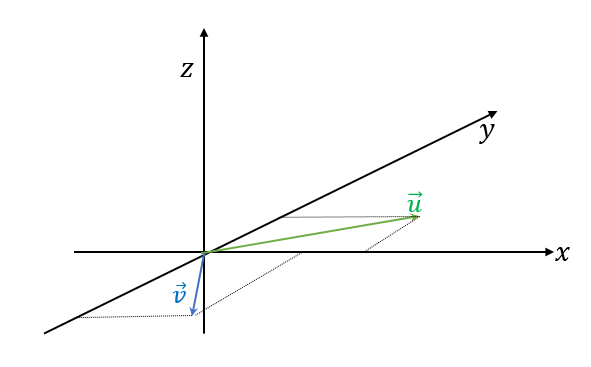

Calculez le produit vectoriel $\vec{w}=\vec{u}∧\vec{v}$

### Calcul en composantes
Une méthode pour calculer le produit vectoriel grâce aux composantes.

Notons les coordonnées $\vec{u} = (u_1, u_2, u_3)$ et $\vec{v} = (v_1, v_2, v_3)$.

Leur produit vectoriel est donné par :
${\displaystyle \vec{u}\wedge \vec{v}={\begin{pmatrix}u_{2}v_{3}-u_{3}v_{2}\\u_{3}v_{1}-u_{1}v_{3}\\u_{1}v_{2}-u_{2}v_{1}\end{pmatrix}}}$.


In [3]:
# ecrivez la fonction cross() qui calcule le produit vectoriel de deux vecteurs
def cross(u,v):
    return (u[1]*v[2]-u[2]*v[1],u[2]*v[0]-u[0]*v[2],u[0]*v[1]-u[1]*v[0])

In [16]:
# testez la fonction cross() avec le main suivant

u, v= (2,3,0), (3,-2,0)
w = cross(u,v)
print(w)

(0, 0, -13)


Calcul de $\vec{v}\wedge\vec{u}$ et de $k.\vec{u}\wedge\vec{u}, k\in\mathbb{R}$

In [14]:
# testez la fonction cross pour calculer v^u, puis k.u^u
u,v = (2,3,0), (3,-2,0)
k = 3
z = cross(v,u)
print(z)
ku = (u[0]*k,k*u[1],k*u[2])
print(ku)
z = cross(ku,u)
print(z)

(0, 0, 13)
(6, 9, 0)
(0, 0, 0)


Dernières propriétés : calculez, pour chacun des exemples :

$\vec{u}\wedge\vec{w}$

$\vec{v}\wedge\vec{w}$

In [17]:
print(cross(u,w))
print(cross(v,w))

(-39, 26, 0)
(26, 39, 0)


## Que constatez-vous ?
*mes notes d'exercice*

---
Comparez avec : [Propriétés du produit vectoriel](https://fr.wikipedia.org/wiki/Produit_vectoriel#Propri%C3%A9t%C3%A9s)

On remarque que cross u v = - cross v u

## Exercice : normale à un triangle en 3D

On souhaite appliquer le calcul du produit vectoriel pour calculer la normale à un triangle de sommets $S_1, S_2, S_3$
$S_1(x_1, y_1, z_1)$
$S_2(x_2, y_2, z_2)$
$S_3(x_3, y_3, z_3)$

Écrivez la fonction normale() qui calcule la normale à un triangle de sommets $S_1, S_2, S_3$

**attention : le vecteur normal doit être normalisé**


In [1]:
# ecrivez la fonction normale() qui calcule la normale à un triangle de sommets S1, S2, S3
def normale(S1, S2, S3):
    u = (S2[0]-S1[0],S2[1]-S1[1],S2[2]-S1[2])
    v = (S3[0]-S1[0],S3[1]-S1[1],S3[2]-S1[2])
    return cross(u,v)

interactive(children=(FloatSlider(value=0.0, description='x', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.update(x=0, y=0, z=0)>

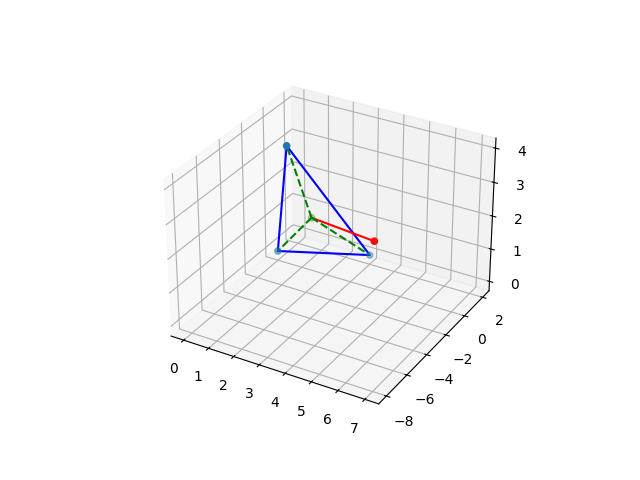

In [7]:
%matplotlib ipympl

# create a 3D figure with a scatter plot of 3 points (0,0,0), (3,2,0) and (0,1,3)

import matplotlib.pyplot as plt
from ipywidgets import interact,fixed
import numpy as np
#import arrow3d
plt.close()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pts = np.array([[0, 0, 0], [3, 2, 0], [0, 1, 3]])
# add pts[0] at the end to close the triangle
pts = np.vstack([pts, pts[0]])
disp= ax.scatter(pts[:-1, 0], pts[:-1, 1], pts[:-1, 2])
# draw a triangle with the 3 points
tri = ax.plot(pts[:, 0], pts[:, 1], pts[:, 2], 'b')
# compute the center of the triangle
center = np.mean(pts[:-1], axis=0)
# draw the normal vector from the center of the triangle
normal = normale(pts[0], pts[1], pts[2])
norm = ax.plot([center[0], center[0]+normal[0]], [center[1], center[1]+normal[1]], [center[2], center[2]+normal[2]], 'r')

supp=[None, None, None]
for i in range(3):
    supp[i]=ax.plot([center[0], pts[i, 0]], [center[1], pts[i, 1]], [center[2], pts[i, 2]], 'g--')
# add a green dot at the center of the triangle and a red dot at the normal vector
exts = np.array([center, center+normal])
dispexts = ax.scatter(exts[:, 0], exts[:, 1], exts[:, 2], c=['g', 'r'])
#plt.show()
def update(x=0, y=0, z=0):
    pts[3] = pts[0] = [x, y, z]
    # update the center
    center = np.mean(pts[:-1], axis=0)
    # update the normal vector
    normal = normale(pts[0], pts[1], pts[2])
    # update the 3D arrow
    #normarrow.newc(center, normal)
    
    norm[0].set_xdata([center[0], center[0]+normal[0]])
    norm[0].set_ydata([center[1], center[1]+normal[1]])
    norm[0].set_3d_properties([center[2], center[2]+normal[2]])

    # update the blue lines
    for i in range(3):
        supp[i][0].set_xdata([center[0], pts[i, 0]])
        supp[i][0].set_ydata([center[1], pts[i, 1]])
        supp[i][0].set_3d_properties([center[2], pts[i, 2]])
    # update the red dot
    disp._offsets3d=(pts[:, 0], pts[:, 1], pts[:, 2])
    exts = np.array([center, center+normal])
    dispexts._offsets3d=(exts[:, 0], exts[:, 1], exts[:, 2])
    #update triangle
    tri[0].set_xdata(pts[:, 0])
    tri[0].set_ydata(pts[:, 1])
    tri[0].set_3d_properties(pts[:, 2])
    
    fig.canvas.draw_idle()

crange = 5
interact(update, x=(-crange, crange, 0.5), y=(-crange, crange, 0.5), z=(-crange, crange, 0.5))

# Distance signée à un plan

Soit un plan P d'équation cartésienne $ax+by+cz+d=0$ et un point M de coordonnées $(x_0, y_0, z_0)$.

on calcule $k = \sqrt{a^2+b^2+c^2}$

On construit alors la fonction $\Gamma$ définie par : $\Gamma(M) = \frac{ax_0+by_0+cz_0+d}{k}$. 

Cette fonction est appelée la distance signée du point M au plan P.

## Exercice d'application

Soit le plan P d'équation $-4x+y+4z-3=0$ et les points $A(0,0,0)$ et $B(1,1,1)$.

Les deux points $A$ et $B$ sont-ils du même côté du plan $P$ ?
 
Vous pouvez utiliser le programme Python suivant pour répondre à la question.

In [8]:
import math
# pour utiser la fonction sqrt()

# ecrivez la fonction distance_signee() qui calcule la distance signée d'un point M à un plan P 
def distance_signee(P, M):
    a, b, c, d = P
    x, y, z = M
    
    # Calcul de la distance signée
    distance = (a*x + b*y + c*z + d) / math.sqrt(a**2 + b**2 + c**2)
    
    return distance

# testez la fonction distance_signee() avec le main suivant
P = (-4, 1, +4, -3)
A = (0, 0, 0)
B = (1, 1, 1)

# affichez la distance signée de A et B au plan P
print(distance_signee(P, A))
print(distance_signee(P, B))

-0.5222329678670935
-0.3481553119113957


Quel point de la droite $(AB)$ appartient au plan $P$ ?

A et B appartienne au plan P

# Matrices de transformations géométriques en 2D

Faites les multiplications matricielles pour visualiser les transformations géométriques de matrices :
M = $\begin{pmatrix} 0.866 & -0.5 \\ 0.5 & 0.866 \end{pmatrix}$
N = $\begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix}$

en utilisant les points suivants qui sont les sommets d'un triangle ABC:
A = (1, 4)
B = (3, 5)
C = (4, 3)

**Complétez le code ci-dessous pour visualiser les transformations géométriques associées aux matrices M et N**

le triangle original est en rouge, le triangle transformé par M est en vert, et le triangle transformé par N est en bleu

**Partie d'initialisation - ne pas modifier**

In [9]:
import numpy as np
import matplotlib.pyplot as plt

M = np.array([[0.866, -0.5], [0.5, 0.866]])
N = np.array([[0, 1], [-1, 0]])
A= np.array([1, 4])
B= np.array([3, 5])
C= np.array([4, 3])

**Partie de calcul - à compléter ci-dessous**

In [10]:
import numpy as np

# Calcul des coordonnées des points transformés par M
Am = M @ A
Bm = M @ B
Cm = M @ C

# Calcul des coordonnées des points transformés par N
An = N @ A
Bn = N @ B
Cn = N @ C

# Affichage des résultats
print("Am:", Am)
print("Bm:", Bm)
print("Cm:", Cm)
print("An:", An)
print("Bn:", Bn)
print("Cn:", Cn)

Am: [-1.134  3.964]
Bm: [0.098 5.83 ]
Cm: [1.964 4.598]
An: [ 4 -1]
Bn: [ 5 -3]
Cn: [ 3 -4]


**Partie d'affichage - ne pas modifier**

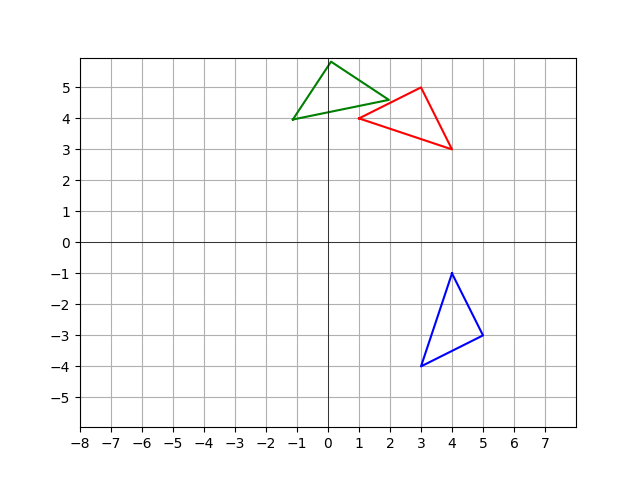

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
# dessiner le triangle ABC en rouge
plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'r')
# dessiner le triangle transformé par M en vert
plt.plot([Am[0], Bm[0], Cm[0], Am[0]], [Am[1], Bm[1], Cm[1], Am[1]], 'g')
# dessiner le triangle transformé par N en bleu
plt.plot([An[0], Bn[0], Cn[0], An[0]], [An[1], Bn[1], Cn[1], An[1]], 'b')

# l'origine du repère est au centre de la figure
plt.axis('equal')
xyrange = 8
# les axes sont gradués de -xyrange à +xyrange sur les deux axes
plt.axis([-xyrange, xyrange, -xyrange, xyrange])
# les graduations sont espacées de 1
plt.xticks(np.arange(-xyrange, xyrange,  1))
plt.yticks(np.arange(-xyrange, xyrange, 1))
# les axes X et Y sont affichés en gras
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.grid()
plt.show()

les informations transmisent par M et N nous permettent la rotation du triangle ABC de 30° et 90° respectivement par rapport au centre 0.
---


# Transformations géométriques et matrices

## Exercice d'application

Quel type de transformation géométrique est représenté par la matrice suivante ?

$A = \begin{pmatrix} 0.866 & 0 & 0.5 \\ 0 & 1 & 0 \\ -0.5 & 0 & 0.866 \end{pmatrix}$

*mes notes d'exercice*


---

In [12]:
# si vous souhaitez calculer le déterminant de la matrice A
import numpy as np
A = np.array([[0.866, 0, 0.5], [0, 1, 0], [-0.5, 0, 0.866]])
print(np.linalg.det(A))

0.999956


## Coordonnées homogènes

une famille de coordonnées homogènes est définie par les 3 premières coordonnées d'un point et une quatrième coordonnée égale à 1.
on confond alors cette famille avec le point de coordonnées cartésiennes correspondantes.

## Exercice
A quelle famille appartiennent les points suivants ?

$\begin{pmatrix} -1 \\ 4 \\ 3 \\ 2 \end{pmatrix}$
$\begin{pmatrix} 2 \\ -8 \\ -6 \\ -4 \end{pmatrix}$
$\begin{pmatrix} 0 \\ 1 \\ 1 \\ -1 \end{pmatrix}$
$\begin{pmatrix} 7 \\ 11 \\ 13 \\ 0 \end{pmatrix}$
$\begin{pmatrix} x \\ y \\ z \\ t \end{pmatrix}$

Vous pouvez utiliser le programme Python suivant pour répondre à la question.

In [17]:
def famille(point):
    x, y, z, t = point
    if t == 0:
        return "Le point est à l'infini"
    return (x/t, y/t, z/t, t/t)

# testez la fonction famille() avec le main suivant
point1 = (-1, 4, 3, 2)
point2 = (2, -8, -6, -4)
point3 = (0, 1, 1, -1)
point4 = (7, 11, 13, 0)
# affichez la famille de point1, point2, point3 et point4
print(famille(point1))
print(famille(point2))
print(famille(point3))
print(famille(point4))

(-0.5, 2.0, 1.5, 1.0)
(-0.5, 2.0, 1.5, 1.0)
(-0.0, -1.0, -1.0, 1.0)
Le point est à l'infini


*mes notes d'exercice*

---

# Matrice de translation en coordonnées homogènes

Déterminez comment est construite la matrice de translation $T$ en coordonnées homogènes d'après le calcul suivant :
$\begin{array}{cc} &
\begin{pmatrix} x\\ y \\ z \\ 1 \end{pmatrix}
\\
T = \begin{pmatrix} ? & ? & ? & ? \\ ? & ? & ? & ? \\ ? & ? & ? & ? \\ ? & ? & ? & ? \end{pmatrix}
&
\begin{pmatrix} x+T_x \\ y+T_y \\ z+T_z \\ 1 \end{pmatrix}
\end{array}$

*mes notes d'exercice*

---
$T = \begin{pmatrix} 1 & 0 & 0 & T_x \\ 0 & 1 & 0 & T_y \\ 0 & 0 & 1 & T_z \\ 0 & 0 & 0 & 1 \end{pmatrix}$

## Visualisation de la rotation d'un carré autour de son centre

On considère un carré de centre $C(0.5,0.5,1)$, en coordonnées homogènes et de côté $1$.

On souhaite effectuer une rotation d'un angle $-\frac{\pi}{6}$ dans le plan de la figure, autour du centre $C$.

**Cet exercice est à réaliser en plusieurs étapes**


***Etape 1 : créer les matrices de translation et de rotation***

In [18]:
# import numpy as np, pour utiliser les matrices
import numpy as np

# a vous de jouer ; donnez les valeurs des matrices de translation et de rotation
# pour le moment, les matrices sont les matrices identités 3x3

def translation_matrix(Tx, Ty):
    return np.array([
        [1,0,Tx],
        [0,1,Ty],
        [0,0,1]])

def rotation_matrix(angle):
    # Utilisation de np.cos() et np.sin() pour calculer le cosinus et le sinus de l'angle
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle), np.cos(angle), 0],
        [0, 0, 1]])

***Etape 2 : écrire la fonctions transform()***

```transform()``` effectue une transformation géométrique sur un point : on crée les matrices de translation et de rotation, puis on effectue le produit matriciel.

```transform_points()``` effectue une transformation géométrique sur un ensemble de points : elle appelle la fonction transform() pour chaque point - CETTE FONCTION N'EST PAS À MODIFIER

In [22]:
# ecrivez la fonction transform() qui effectue une transformation géométrique sur un point
# pour le moment, la fonction ne modifie pas le point

# pour effectuer le produit matriciel avec numpy, utilisez @ : C = A @ B
# cela fonctionne aussi pour les matrices et les vecteurs

def transform(point, C, angle):
    # Convertir le point en coordonnées homogènes
    point_homogeneous = np.array([point[0], point[1], 1])
    
    # Étape 1: Translation du point vers l'origine
    translation_to_origin = translation_matrix(-C[0], -C[1])
    point_at_origin = np.dot(translation_to_origin, point_homogeneous)
    
    # Étape 2: Application de la rotation
    rotation = rotation_matrix(angle)
    rotated_point = np.dot(rotation, point_at_origin)
    
    # Étape 3: Translation du point de retour à sa position originale
    translation_back = translation_matrix(C[0], C[1])
    transformed_point = np.dot(translation_back, rotated_point)
    
    # Retourner le point transformé
    return transformed_point



# la fonction transform_points() effectue une transformation géométrique sur un ensemble de points
# en appelant la fonction transform() pour chaque point
# pas besoin de modifier cette fonction
def transform_points(points, C, angle):
    # créer un nouvel np.array pour stocker les points transformés
    points_trans = np.zeros(points.shape)
    # pour chaque point, appeler la fonction transform()
    for i in range(points.shape[0]):
        points_trans[i] = transform(points[i], C, angle)
    return points_trans


***Etape 3 : testez visuellement la transformation du carré initial en exécutant le code suivant***

Le carré initial est en rouge, le carré transformé est en bleu, en traits pointillés.

La figure est interactive : vous pouvez modifier l'angle de rotation avec le curseur.

interactive(children=(FloatSlider(value=0.0, description='angle', max=3.141592653589793, min=-3.14159265358979…

<function __main__.update(angle)>

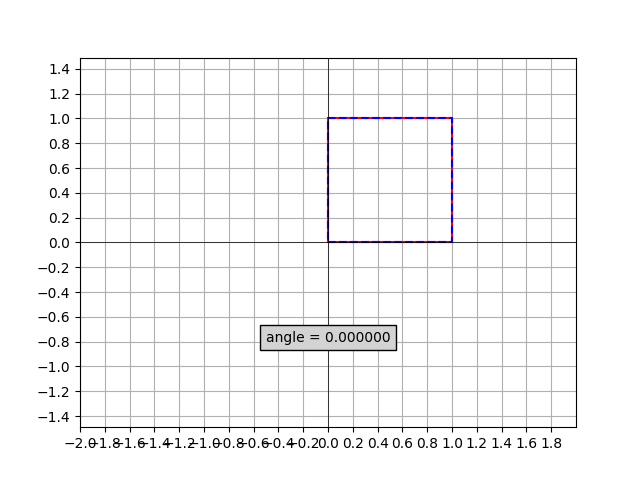

In [23]:
%matplotlib ipympl
# CES LIGNES DE CODE SONT A EXECUTER UNE SEULE FOIS
# NE LES MODIFIEZ PAS

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed, widgets

# créer les 4 points du carré initial, avec une coordonnée homogène égale à 1
points = np.array([[0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], [0, 0, 1]])
C = np.array([0.5, 0.5, 1])
points2 = transform_points(points, C, -np.pi/6)
# dessiner le carré initial en rouge
fig = plt.figure()
ax = fig.add_subplot(111)
c1 = ax.plot(points[:, 0], points[:, 1], 'r')
# dessiner le carré transformé en bleu, en traits pointillés
c2 = ax.plot(points2[:, 0], points2[:, 1], 'b--')
# l'origine du repère est au centre de la figure
ax.axis('equal')
# ajoute une grille
ax.grid(True)
xyrange = 2
# les axes sont gradués de -xyrange à +xyrange sur les deux axes
ax.axis([-xyrange, xyrange, -xyrange, xyrange])
# les graduations sont espacées de 0.2
ax.set_xticks(np.arange(-xyrange, xyrange, 0.2))
ax.set_yticks(np.arange(-xyrange, xyrange, 0.2))
# les axes X et Y sont affichés en gras
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
# affiche l'angle dans un texte situé juste en dessous de la figure
anglet = ax.text(-0.5, -0.8, f'angle = {-np.pi/6:.6f}', fontsize=10)
# affiche un fond blanc et un cadre noir pour le texte
anglet.set_bbox(dict(facecolor='lightgrey', alpha=1.0, edgecolor='black'))

def update(angle):
    points2 = transform_points(points, C, -angle)
    c2[0].set_data(points2[:, 0], points2[:, 1])
    anglet.set_text(f'angle = {angle:.6f}')
    fig.canvas.draw_idle()
    
interact(update, angle=widgets.FloatSlider(min=-np.pi, max=np.pi, step=0.1, value=0))

*mes notes d'exercice*

---